In [1]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

In [2]:
# Importation of data
list_tickers = ["META", "NFLX", "TSLA"]
database = yf.download(list_tickers)

# Take only the adjusted stock price
database = database["Adj Close"]

database

[*********************100%***********************]  3 of 3 completed


,META,NFLX,TSLA
Date,,,
2002-05-23,NaN,1.196429,NaN
2002-05-24,NaN,1.210000,NaN
2002-05-28,NaN,1.157143,NaN
2002-05-29,NaN,1.103571,NaN
2002-05-30,NaN,1.071429,NaN
...,...,...,...
2022-12-12,114.709999,315.179993,167.820007
2022-12-13,120.150002,320.339996,160.949997
2022-12-14,121.589996,317.829987,156.800003


In [3]:
# Drop missing values
data = database.dropna()

In [5]:
# Create the SMA15 for the stocks
data["SMA15 META"] = data["META"].rolling(15).mean().shift(1)
data["SMA15 NFLX"] = data["NFLX"].rolling(15).mean().shift(1)
data["SMA15 TSLA"] = data["TSLA"].rolling(15).mean().shift(1)

# Create a SMA60
data["SMA60 META"] = data["META"].rolling(60).mean().shift(1)
data["SMA60 NFLX"] = data["NFLX"].rolling(60).mean().shift(1)
data["SMA60 TSLA"] = data["TSLA"].rolling(60).mean().shift(1)

# Plot the data
print(data)

                  META        NFLX        TSLA  SMA15 META  SMA15 NFLX  \
Date                                                                     
2012-05-18   38.230000    9.994286    1.837333         NaN         NaN   
2012-05-21   34.029999   10.248571    1.918000         NaN         NaN   
2012-05-22   31.000000    9.672857    2.053333         NaN         NaN   
2012-05-23   32.000000   10.272857    2.068000         NaN         NaN   
2012-05-24   33.029999   10.038571    2.018667         NaN         NaN   
...                ...         ...         ...         ...         ...   
2022-12-12  114.709999  315.179993  167.820007  114.598667  299.908004   
2022-12-13  120.150002  320.339996  160.949997  114.776000  301.721336   
2022-12-14  121.589996  317.829987  156.800003  115.462001  304.074003   
2022-12-15  116.150002  290.410004  157.669998  116.138667  306.150002   
2022-12-16  119.430000  290.709991  150.229996  116.399334  306.077336   

            SMA15 TSLA  SMA60 META  S

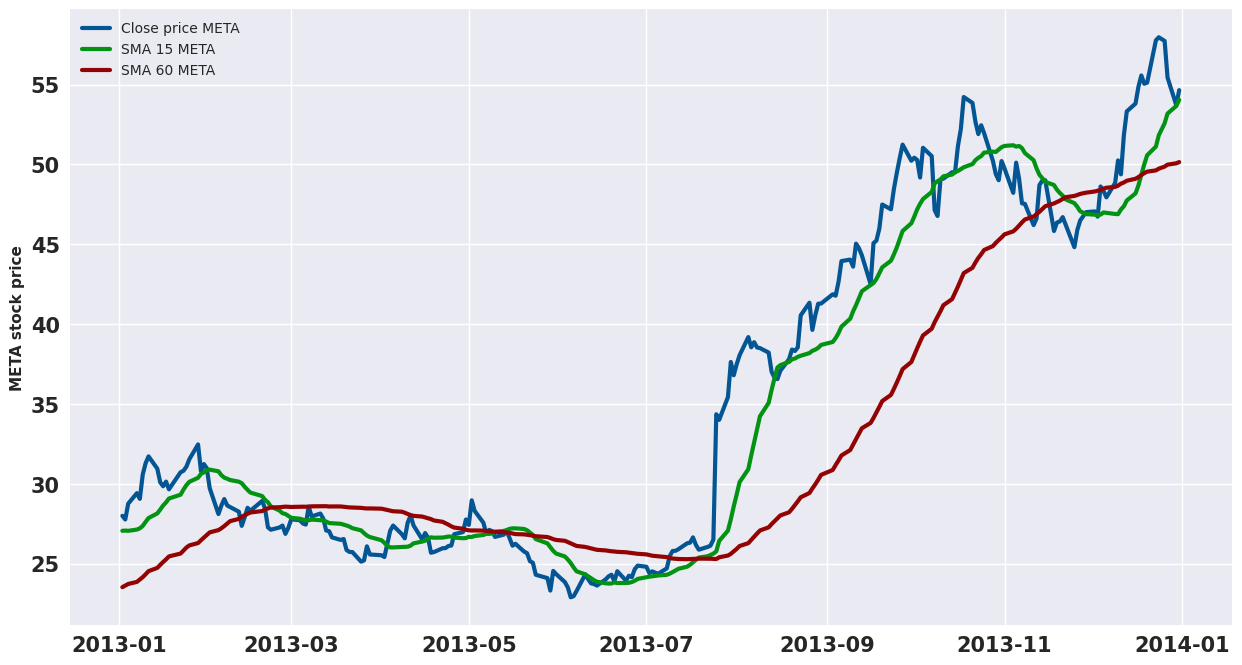

In [8]:
# Plot the CM
plt.figure(figsize=(15,8))
plt.plot(data["META"].loc["2013"], color="#035593", linewidth=3)
plt.plot(data["SMA15 META"].loc["2013"], color="#039313", linewidth=3)
plt.plot(data["SMA60 META"].loc["2013"], color="#930303", linewidth=3)
plt.ylabel("META stock price",fontweight="bold")
plt.legend(["Close price META", "SMA 15 META", "SMA 60 META"])
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.show()